In [ ]:
import scvi

In [1]:
import scanpy as sc
from pathlib import Path

In [2]:
# Base path to all datasets
base_path = Path("/projects/bioinformatics/DB/IMMUCan/datasets")

# File names (can also be pulled dynamically from the folder)
file_names = [
    "RCC_UNB_10X_SCP1288.h5ad",
    "MEL_IMM_SS2_GSE120575.h5ad",
    "NSCLC_T_10X_GSE179994.h5ad",
    "BCC_BIA_10X_GSE123813.h5ad",
    "CLL_IMM_10X_GSE111014.h5ad"
]

# Generate dataset IDs from file names
dataset_ids = [f"adata{i+1}" for i in range(len(file_names))]

# Load all .h5ad files into a dictionary
adatas = {
    dataset_id: sc.read_h5ad(base_path / file_name)
    for dataset_id, file_name in zip(dataset_ids, file_names)
}


In [7]:
print(adatas["adata1"].raw is not None)

False


In [10]:
!pwd

/home/znazari


In [11]:
from scipy.io import mmread
from scipy.sparse import csr_matrix

# Load the sparse matrix
mtx = mmread('/home/znazari/matrix.mtx').tocsr()

print("Matrix shape:", mtx.shape)


Matrix shape: (60627, 39391)


In [15]:
import pandas as pd
from scipy.io import mmread

# Load the raw UMI count matrix
matrix = mmread('/home/znazari/matrix.mtx').tocsr()

# Load gene names and cell barcodes
genes = pd.read_csv('/home/znazari/genes.tsv', sep='\t', header=None)
barcodes = pd.read_csv('/home/znazari/barcodes.tsv', sep='\t', header=None)

# Create labeled DataFrame of raw UMI counts
df = pd.DataFrame.sparse.from_spmatrix(
    matrix,
    index=genes[0],       # Adjust if necessary: genes[0] or genes[1]
    columns=barcodes[0]
)

# Show raw UMI values (first 10 genes × 10 cells)
df.iloc[10:100, 10:100]


,AAACCTGTCGTACGGC.p55,AAACCTGTCTAGAGTC.p55,AAACCTGTCTTCAACT.p55,AAACGGGCAAGGTGTG.p55,AAACGGGCACCAGGCT.p55,AAACGGGCATAACCTG.p55,AAACGGGCATCACCCT.p55,AAACGGGCATGAAGTA.p55,AAACGGGCATGCTGGC.p55,AAACGGGCATTGCGGC.p55,...,AACGTTGAGATCGATA.p55,AACGTTGCAAAGGTGC.p55,AACGTTGCAATACGCT.p55,AACGTTGCAGCAGTTT.p55,AACGTTGCAGCGTCCA.p55,AACGTTGGTCAGATAA.p55,AACGTTGGTCCTAGCG.p55,AACGTTGGTTCCACTC.p55,AACGTTGTCCAACCAA.p55,AACTCAGAGCGGCTTC.p55
0,,,,,,,,,,,,,,,,,,,,,
AL627309.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
AL627309.6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DVL1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MXRA8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AURKAIP1,0,1,1,0,0,0,0,1,0,0,...,1,0,0,4,2,0,1,0,1,0


In [16]:
adatas["adata1"].X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 40681270 stored elements and shape (33069, 24415)>

In [5]:
adatas["adata1"].obs 

,nCount_RNA,nFeature_RNA,sample,patient,location,tissue,annotation_authors,disease_subtype,disease_stage,treatment,...,treatment_pre,percent_mt,seurat_clusters,annotation_CHETAH,copykat.pred,cell_ontology,cell_ontology_id,annotation_major,annotation_immune,annotation_minor
AAACCTGAGAATAGGG.p55,1430.0,769,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,3.631285,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGAGGCTAGGT.p55,1797.0,865,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,5.453534,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGCACTGTGTA.p55,2071.0,987,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,2.366007,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGCAGTCCTTC.p55,682.0,368,P55_scRNA,P55,abdomen,metastasis,MitoHigh T-Helper,clear cell renal carcinoma,IV,ICB,...,TKI,9.824047,4,T CD8,NA,Unknown,NCIT:C17998,Unknown,Unknown,Unknown
AAACCTGGTAAATGTG.p55,2914.0,1190,P55_scRNA,P55,abdomen,metastasis,41BB-Lo CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,2.401372,5,T CD8,NA,T eff,CL:0001050,T,T CD8,T CD8 eff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGGAACGTGAGGGAG.p916,2462.0,893,P916_scRNA,P916,lymph node,metastasis,Effector T-Helper,clear cell renal carcinoma,IV,NoICB,...,NoTKI,3.654080,3,T CD4,NA,T CD4 memory,CL:0000897,T,T CD4,T CD4 mem
TTGTAGGGTATGAAAC.p916,7148.0,2281,P916_scRNA,P916,lymph node,metastasis,41BB-Lo CD8+ T cell,clear cell renal carcinoma,IV,NoICB,...,NoTKI,2.419580,0,T CD8,diploid,T ex,NCIT:C120000,T,T CD8,T CD8 ex
TTTACTGCACACATGT.p916,5423.0,1962,P916_scRNA,P916,lymph node,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,NoICB,...,NoTKI,2.009217,0,T CD8,diploid,T ex,NCIT:C120000,T,T CD8,T CD8 ex
TTTGTCAAGAGCAATT.p916,4647.0,1364,P916_scRNA,P916,lymph node,metastasis,Effector T-Helper,clear cell renal carcinoma,IV,NoICB,...,NoTKI,3.032258,3,T CD4,diploid,T CD4 memory,CL:0000897,T,T CD4,T CD4 mem


In [61]:
adatas["adata1"].obs.head()

,nCount_RNA,nFeature_RNA,sample,patient,location,tissue,annotation_authors,disease_subtype,disease_stage,treatment,...,treatment_pre,percent_mt,seurat_clusters,annotation_CHETAH,copykat.pred,cell_ontology,cell_ontology_id,annotation_major,annotation_immune,annotation_minor
AAACCTGAGAATAGGG.p55,1430.0,769,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,3.631285,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGAGGCTAGGT.p55,1797.0,865,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,5.453534,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGCACTGTGTA.p55,2071.0,987,P55_scRNA,P55,abdomen,metastasis,41BB-Hi CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,2.366007,0,T CD8,NA,T ex,NCIT:C120000,T,T CD8,T CD8 ex
AAACCTGCAGTCCTTC.p55,682.0,368,P55_scRNA,P55,abdomen,metastasis,MitoHigh T-Helper,clear cell renal carcinoma,IV,ICB,...,TKI,9.824047,4,T CD8,NA,Unknown,NCIT:C17998,Unknown,Unknown,Unknown
AAACCTGGTAAATGTG.p55,2914.0,1190,P55_scRNA,P55,abdomen,metastasis,41BB-Lo CD8+ T cell,clear cell renal carcinoma,IV,ICB,...,TKI,2.401372,5,T CD8,NA,T eff,CL:0001050,T,T CD8,T CD8 eff


In [59]:
adatas["adata1"].shape
adatas["adata5"].obs_names[:5]


Index(['AAACCTGAGACCTTTG-scRNA-seq_CLL6_d0',
       'AAACCTGAGCCGTCGT-scRNA-seq_CLL6_d0',
       'AAACCTGCAAACAACA-scRNA-seq_CLL6_d0',
       'AAACCTGCACTCGACG-scRNA-seq_CLL6_d0',
       'AAACGGGAGACAGAGA-scRNA-seq_CLL6_d0'],
      dtype='object')

In [62]:
adatas["adata1"].X

<Compressed Sparse Column sparse matrix of dtype 'float32'
	with 40681270 stored elements and shape (33069, 24415)>

In [63]:
# View first 5 cells and first 5 genes
adatas["adata1"].X[:10, :100].toarray()


array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.      

In [64]:
sc.pp.calculate_qc_metrics(adatas["adata1"], inplace=True)
adatas["adata1"].obs[['total_counts', 'n_genes_by_counts']].describe()


,total_counts,n_genes_by_counts
count,33069.000000,33069.000000
mean,1901.842773,1230.193535
std,561.293152,972.289861
min,444.962250,249.000000
25%,1466.828857,589.000000
50%,1869.773438,922.000000
75%,2288.255371,1467.000000
max,4603.094727,10117.000000


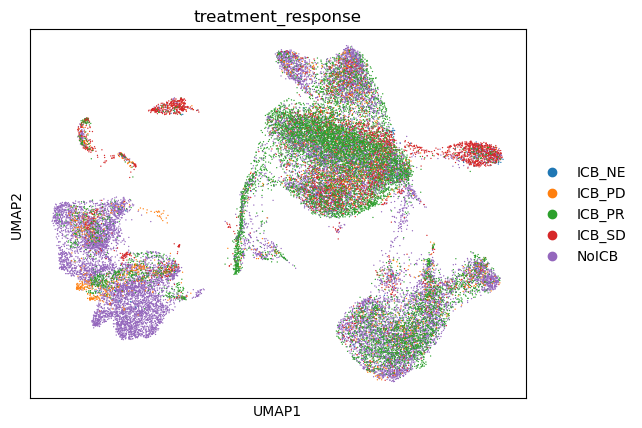

In [65]:
sc.pl.umap(adatas["adata1"], color='treatment_response')

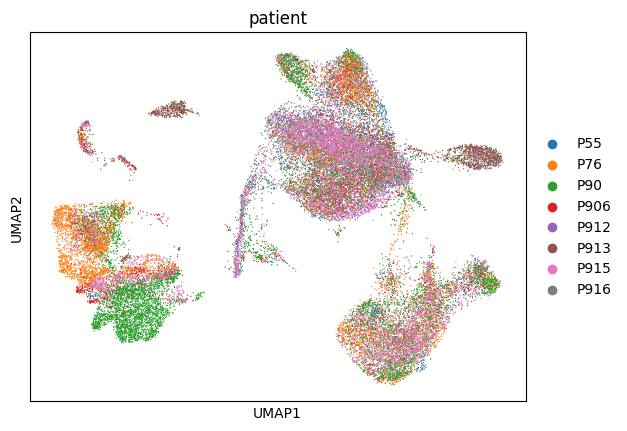

In [24]:
sc.pl.umap(adata, color='patient')

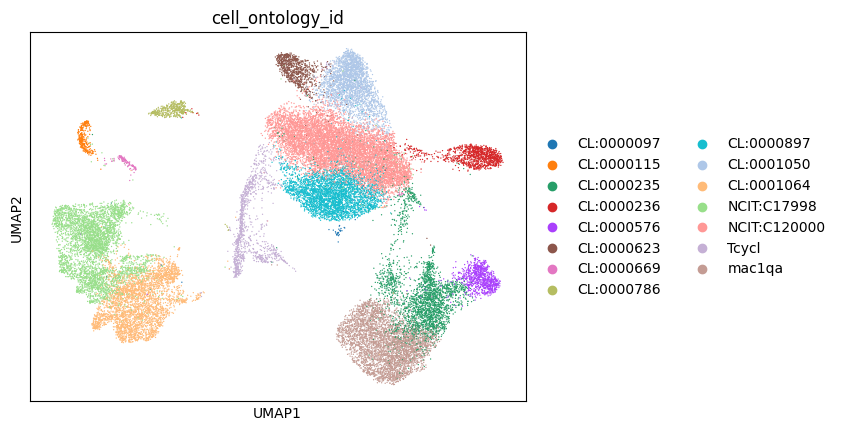

In [25]:
sc.pl.umap(adata, color='cell_ontology_id')

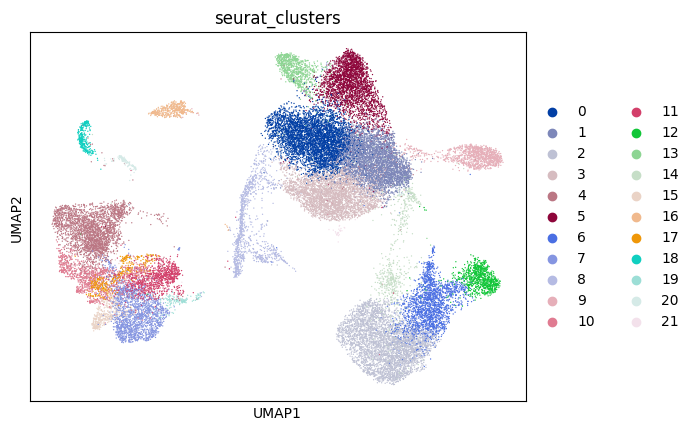

In [34]:
sc.pl.umap(adata, color='seurat_clusters')